In [0]:
from keras import models
from keras import layers
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout,ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from matplotlib import pyplot


## Read Data 

Ths option is  for Google Colab - Reading from Google Drive 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Hello Google Drive!

Read the train and test data from the drive 

In [0]:
Train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')
Test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')

This option is to read localy the files 

In [0]:
Train = pd.read_csv("train_digits.csv")
Test = pd.read_csv("test_digits.csv")

In [33]:
Train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Read the labels into a seprate array
y_train = Train['label'].values

#convert the images into a matrix of size 42,000 X 28 X 28 
train_images = Train.loc[:,Train.columns != 'label'].values
train_images = train_images.reshape(42000,28,28,1)
train_images.shape


(42000, 28, 28, 1)

## Reshape
Convert to the Keras expected sahpe

In [55]:

#convert the images into a matrix of size 28,000 X 28 X 28 
test_images = Test.values
test_images_final = test_images.reshape(28000,28,28,1)
test_images_final.shape


(28000, 28, 28, 1)

## Displaying Grid of some images

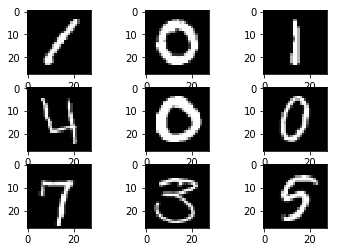

In [56]:
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(train_images[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

## Preparing the image data

In [0]:
#reshape data to fit model
#X_train = X_train.reshape(42000,28,28,1)
train_images = train_images.astype('float32') / 255
#test_images_final = X_test.reshape(28000,28,28,1)
test_images_final = test_images_final.astype('float32') / 255

## The network architecture

In [0]:
#network = models.Sequential()
#network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#network.add(layers.Dense(512, activation='relu'))
#network.add(layers.Dense(10, activation='softmax'))


#create model
network = models.Sequential()
#convolutional layer with rectified linear unit activation
network.add(ZeroPadding2D(padding=(1, 1), data_format=None))
network.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1)))
#32 convolution filters used each of size 8X8
#again
network.add(ZeroPadding2D(padding=(1, 1), data_format=None))
network.add(Conv2D(64, (6, 6), activation='relu'))
network.add(ZeroPadding2D(padding=(1, 1), data_format=None))
network.add(Conv2D(128, (7, 7), activation='relu'))
#64 convolution filters used each of size 5x5
#choose the best features via pooling
network.add(MaxPooling2D(pool_size=(5, 5)))
#randomly turn neurons on and off to improve convergence
network.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
network.add(Flatten())
#fully connected to get all relevant data
network.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
network.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
network.add(Dense(10, activation='softmax'))

## The compilation step

In [0]:
from keras import optimizers
network.compile(optimizer='Adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

## Spliting the Train data 

In [0]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, y_train, test_size=0.15)

In [61]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
train_labels.shape



(35700, 10)

## Pre Processing

## Feature Standardization
It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset.

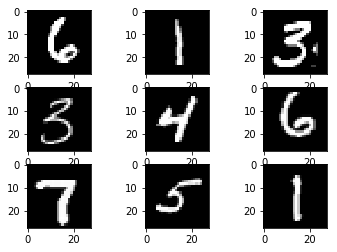

In [42]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, train_labels, batch_size=35700):
  
  break
  
X_Train = X_batch
y_train = y_batch
X_Train.shape

for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_Train[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
pyplot.show()




In [47]:
print(y_train.shape)
print(X_train.shape)

(35700, 10)
(35700, 28, 28, 1)


## Random Rotations

(35700, 28, 28, 1)
(35700, 10)


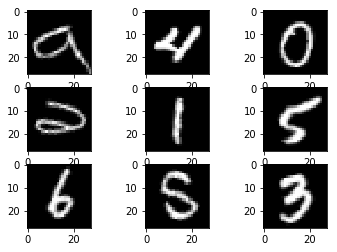

In [69]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=30)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, train_labels, batch_size=35700):
  
  break
  
X_trainRotate = X_batch
y_trainRotate = y_batch
print(X_trainRotate.shape)
print(y_trainRotate.shape)

for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_trainRotate[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
pyplot.show()

In [72]:
X_trainCombine = np.concatenate((X_train,X_trainRotate),axis=0)
y_trainCombine = np.concatenate((train_labels,y_trainRotate),axis=0)
print(X_trainCombine.shape)
print(y_trainCombine.shape)

(71400, 28, 28, 1)
(71400, 10)


## Preparing the labels

## Fit the Network

In [84]:
history = network.fit(X_train, train_labels, epochs=50, batch_size=1024,validation_data=(X_test,test_labels))

Train on 35700 samples, validate on 6300 samples
Epoch 1/50
35700/35700 [==============================] - 8s 224us/step - loss: 0.9748 - acc: 0.6939 - val_loss: 0.1989 - val_acc: 0.9405
Epoch 2/50
35700/35700 [==============================] - 5s 142us/step - loss: 0.2355 - acc: 0.9297 - val_loss: 0.1002 - val_acc: 0.9675
Epoch 3/50
35700/35700 [==============================] - 5s 143us/step - loss: 0.1471 - acc: 0.9560 - val_loss: 0.0758 - val_acc: 0.9757
Epoch 4/50
35700/35700 [==============================] - 5s 144us/step - loss: 0.1013 - acc: 0.9696 - val_loss: 0.0517 - val_acc: 0.9833
Epoch 5/50
35700/35700 [==============================] - 5s 146us/step - loss: 0.0718 - acc: 0.9787 - val_loss: 0.0441 - val_acc: 0.9871
Epoch 6/50
35700/35700 [==============================] - 5s 147us/step - loss: 0.0592 - acc: 0.9818 - val_loss: 0.0381 - val_acc: 0.9871
Epoch 7/50
35700/35700 [==============================] - 5s 147us/step - loss: 0.0530 - acc: 0.9844 - val_loss: 0.0334 - v

## Model Performances 

In [85]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
print('test_acc:', test_acc)

6300/6300 [==============================] - 1s 106us/step
test_acc: 0.9939682540439424


In [0]:
#Make Prediction
predict = network.predict(test_images_final)
#Convert the results to the digits value 
y_classes = [np.argmax(y, axis=None, out=None) for y in predict]

## Plotting the training and validation loss

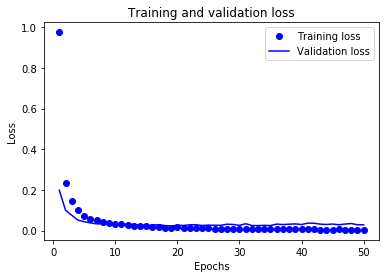

In [87]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range (1,len(history_dict['loss'])+1)
#epochs = range(1, 36)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
x = list(range(1, 28001))
df = pd.DataFrame({'ImageId' :x,'Label':y_classes})
df.to_csv("digitcnn2_1.csv",index=False)


In [0]:
from google.colab import files
files.download('digitcnn2_1.csv') 

## Example of Real Image